In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.express as px

In [4]:
uploaded = files.upload()

Saving swiggy.csv to swiggy.csv


In [5]:
df = pd.read_csv('swiggy.csv')
df.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [ ]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [ ]:
# Unique restaurants
unique_restaurant = df['Restaurant'].nunique()
unique_restaurant

7865

In [ ]:
# display all cuisines
cuisines = df['Food type'].str.split(',').explode().str.strip()
number_of_cuisines = cuisines.value_counts()
number_of_cuisines

,count
Food type,
Chinese,2588
North Indian,1921
Indian,1772
Fast Food,1550
Beverages,1524
...,...
Bakery Sweets Desserts,1
South Indian Biryani,1
Indian Snacks,1


In [ ]:
# Number of restaurants per cities
num_per_city = df.groupby('City')['City'].count()
num_per_city

,City
City,
Ahmedabad,717
Bangalore,946
Chennai,1106
Delhi,611
Hyderabad,1075
Kolkata,1346
Mumbai,1277
Pune,1090
Surat,512


In [ ]:
num_per_city.idxmax()

'Kolkata'

In [ ]:
# Highest rated restaurant

rest_by_rating = df.sort_values(by='Avg ratings', ascending=False)
rest_by_rating[['Restaurant','City','Avg ratings']].head(10)

,Restaurant,City,Avg ratings
5424,Get In My Belly,Mumbai,5.0
5425,The Asian Pavilion,Mumbai,5.0
5519,Cafe Kokomo,Mumbai,5.0
8571,Afresh,Chennai,5.0
6297,Fat Tiger,Delhi,5.0
6033,Zorro - Milkshakes And Thickshakes,Hyderabad,5.0
5885,Nivala Apka Apna,Mumbai,5.0
5936,Tricky Shakes,Bangalore,5.0
6390,Nasi And Mee,Chennai,5.0
5684,Papacream,Pune,5.0


In [ ]:
# Cost of two person across cities
city_wise = df.groupby('City')['Price'].mean().reset_index()
city_wise



,City,Price
0,Ahmedabad,318.128312
1,Bangalore,382.524313
2,Chennai,356.247740
3,Delhi,333.301146
4,Hyderabad,299.926512
5,Kolkata,362.294205
6,Mumbai,393.794832
7,Pune,353.763303
8,Surat,270.171875


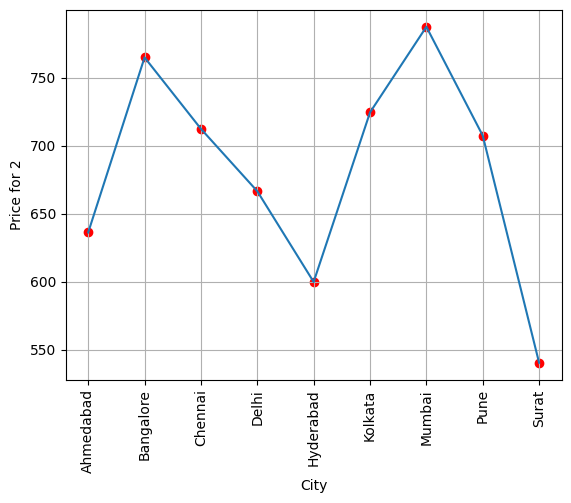

In [ ]:
X_city = city_wise['City']
y_price = city_wise['Price']*2

plt.figure()
plt.grid()
plt.plot(X_city, y_price)
plt.scatter(X_city, y_price, c='red')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Price for 2')
plt.show()

In [ ]:
# For interactive plot using plotly as px (hovering, zooming)
city_wise_sorted = city_wise.sort_values(by='City')
fig = px.line(city_wise_sorted, x='City', y='Price', title='Cost of 2 per city', labels={'City': 'City', 'Price': 'Price'}, markers=True)
fig.show()



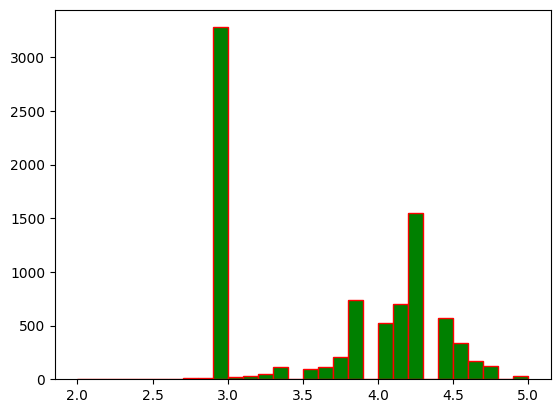

In [96]:
# Distribution of restaurant ratings
ratings = df['Avg ratings']
plt.hist(ratings, bins=30, color='green', edgecolor='red')
plt.show()

<Axes: xlabel='Avg ratings', ylabel='Count'>

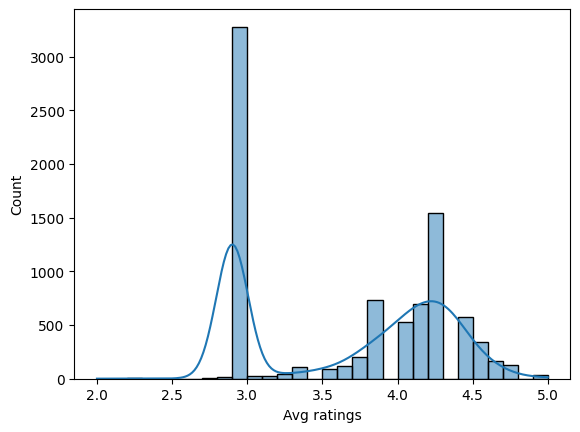

In [95]:
sns.histplot(data=df, x='Avg ratings', bins=30, kde=True)

In [100]:
pr = df.sort_values(by='Price')
pr

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
2830,283144,Athwa,Surat,Monginis,0.0,2.9,80,Desserts,Udhyognagar,46
1393,73662,Annanagar East,Chennai,Mozza,0.0,2.9,80,"Continental,Chinese,Italian,Mexican",Annangar East,64
6999,55710,Paldi,Ahmedabad,Ladli Fast Food,0.0,3.5,20,"Fast Food,Italian",Paldi,34
6995,55365,Isanpur,Ahmedabad,Maruti Dhosa Hub,0.0,4.1,20,South Indian,Vishal Nagar,49
7218,77391,Ghodasar,Ahmedabad,Comfy Restaurant,0.0,4.0,100,"Indian,Chinese",Isanpur,48
...,...,...,...,...,...,...,...,...,...,...
8485,439628,Brigade Road,Bangalore,Lubov Patisserie By Frozen Bottle,2000.0,2.9,80,Bakery,Brigade Road,36
2782,272388,Sangamvadi,Pune,Conrad Pune,2000.0,4.4,20,"Continental,Italian",Koregaon Park,53
4718,394904,Scruz Bandra East,Mumbai,Origami Japanese & Korean Restaurant,2500.0,4.4,20,"Japanese,Korean,Barbecue",Bandra Kurla Complex,48
3079,306434,Mylapore,Chennai,Malgudi - The Savera Hotel,2500.0,4.1,50,"North Indian,South Indian",Mylapore,62


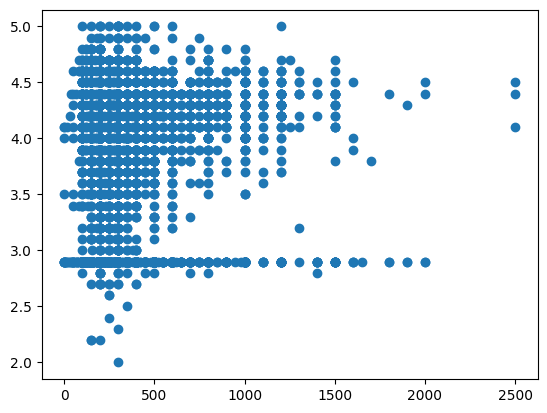

In [ ]:
# Correlation between Price and rating
plt.scatter(df['Price'], df['Avg ratings'])
plt.show()

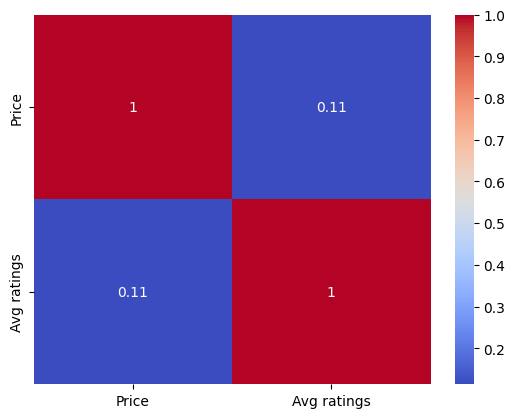

In [97]:
corr_mat = df[['Price','Avg ratings']].corr()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [147]:
# Common cuisines in top rated restaurants
# cuisine_rating = df1.groupby('Cuisines')['Avg ratings'].mean().sort_values(ascending=False).head(20).reset_index()
# cuisine_rating

In [146]:
# df1 = df.copy()
# df1['Cuisines'] = df1['Food type'].str.split(',')
# df1 = df1.explode('Cuisines')
# df1['Cuisines'] = df1['Cuisines'].str.strip().str.title()
# df1
# #df1.groupby('Cuisines')['Price'].mean().sort_values(ascending=False).head(20)

In [47]:
# Expensive cuisines
import re

df1 = df.copy()

df1['Cuisines'] = df1['Food type'].str.split(r',|\s{2,}')

df1 = df1.explode('Cuisines')
df1['Cuisines'] = df1['Cuisines'].str.strip().str.title()

df1.groupby('Cuisines')['Price'].mean().sort_values(ascending=False).head(20)

,Price
Cuisines,
Japanese,1122.625000
Indonesian,1085.714286
Korean,1000.000000
Tribal,1000.000000
Steakhouse,950.000000
Goan,925.000000
Portuguese,900.000000
Greek,900.000000
Spanish,900.000000


In [145]:
# Top rated Cuisines everywhere
df1.groupby('Cuisines')['Avg ratings'].mean().sort_values(ascending=False).head(20)

,Avg ratings
Cuisines,
Ice Cream Cakes,4.500000
Naga,4.400000
Indonesian,4.385714
Steakhouse,4.300000
Assamese,4.300000
South American,4.300000
Special Discount From (The Scoop),4.300000
Vietnamese,4.285714
North Eastern,4.283333


In [151]:
# Most common cuisines in top rated restaurants

df_rating = df.sort_values(by='Avg ratings', ascending=False)
df_rating[['Restaurant','Avg ratings','Food type']].head(20)

,Restaurant,Avg ratings,Food type
5424,Get In My Belly,5.0,Indian
5425,The Asian Pavilion,5.0,Asian Chinese
5519,Cafe Kokomo,5.0,"Beverages,Snacks,Desserts,Bakery"
8571,Afresh,5.0,"Healthy Food,Salads,Desserts,Beverages"
6297,Fat Tiger,5.0,"Pizzas,Chinese,Snacks,Beverages,American"
6033,Zorro - Milkshakes And Thickshakes,5.0,Beverages
5885,Nivala Apka Apna,5.0,"North Indian,Chinese,Indian"
5936,Tricky Shakes,5.0,"Ice Cream,Beverages"
6390,Nasi And Mee,5.0,"Pan-Asian,Singaporean,Malaysian,Japanese,Asian..."
5684,Papacream,5.0,Ice Cream


In [11]:
# Areas having the most restaurants
df.groupby('Area')['Area'].count().idxmax()

'Rohini'

In [21]:
num_rest = df.groupby('Area')['Area'].count().reset_index(name='count')
num_rest.sort_values(by='count', ascending=False).head(10)

,Area,count
593,Rohini,257
141,Chembur,208
360,Kothrud,149
32,Andheri East,135
477,Navrangpura,132
272,Indiranagar,130
368,Kurla,129
353,Koramangala,124
104,Bidhannagar,123
47,Ashok Nagar,118


In [23]:
# Average price andd rating by location
avg_price_rating = df.groupby('Area')[['Price','Avg ratings']].mean()
avg_price_rating

,Price,Avg ratings
Area,,
Akhbar Nagar Circle,200.0,2.900000
Begumpet,480.0,2.900000
26,450.0,4.200000
3Rd Block Jayanagar,100.0,4.000000
A Unit Of M/S Cohort Ruby Area,300.0,4.200000
...,...,...
Yamuna Nagar,250.0,3.233333
Yerawada,450.0,3.428571
Yoginagar Society,200.0,3.900000


In [26]:
# Check all the restaurants with price equals to zero
df[df['Price']==0.0]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1393,73662,Annanagar East,Chennai,Mozza,0.0,2.9,80,"Continental,Chinese,Italian,Mexican",Annangar East,64
2830,283144,Athwa,Surat,Monginis,0.0,2.9,80,Desserts,Udhyognagar,46
6995,55365,Isanpur,Ahmedabad,Maruti Dhosa Hub,0.0,4.1,20,South Indian,Vishal Nagar,49
6999,55710,Paldi,Ahmedabad,Ladli Fast Food,0.0,3.5,20,"Fast Food,Italian",Paldi,34
7218,77391,Ghodasar,Ahmedabad,Comfy Restaurant,0.0,4.0,100,"Indian,Chinese",Isanpur,48


In [28]:
# Since there are only 5 such entries, it is better to drop them
df = df[df['Price'] !=0]

In [29]:
# Visualization
# Heatmap of average restaurant ratings by area
avg_rating_by_area = df.groupby('Area')['Avg ratings'].mean().reset_index(name='Ratings')
avg_rating_by_area


,Area,Ratings
0,Akhbar Nagar Circle,2.900000
1,Begumpet,2.900000
2,26,4.200000
3,3Rd Block Jayanagar,4.000000
4,A Unit Of M/S Cohort Ruby Area,4.200000
...,...,...
827,Yamuna Nagar,3.233333
828,Yerawada,3.428571
829,Yoginagar Society,3.900000
830,Yousufguda,4.050000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Kolkata'),
  Text(6, 0, 'Mumbai'),
  Text(7, 0, 'Pune'),
  Text(8, 0, 'Surat')])

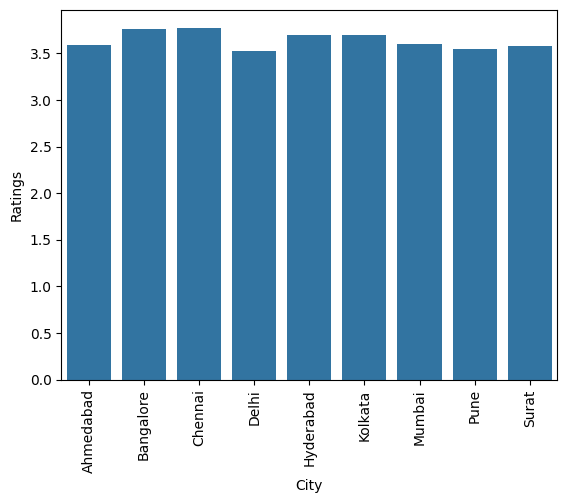

In [42]:
avg_rating_by_city = df.groupby('City')['Avg ratings'].mean().reset_index(name='Ratings')
sns.barplot(x=avg_rating_by_city['City'], y= avg_rating_by_city['Ratings'])
plt.xticks(rotation=90)

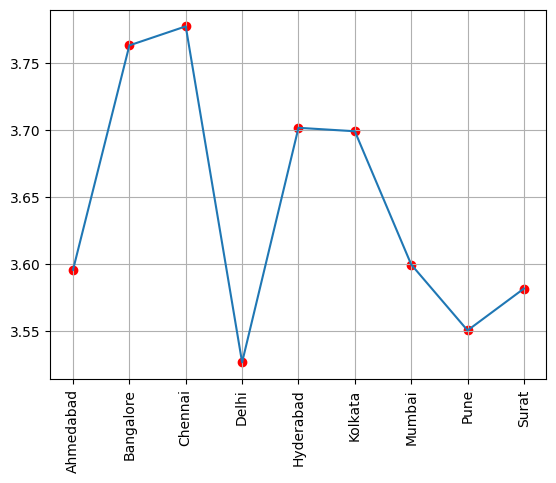

In [41]:
plt.plot(avg_rating_by_city['City'], avg_rating_by_city['Ratings'])
plt.scatter(avg_rating_by_city['City'], avg_rating_by_city['Ratings'],c='red')
plt.xticks(rotation=90)
plt.grid()

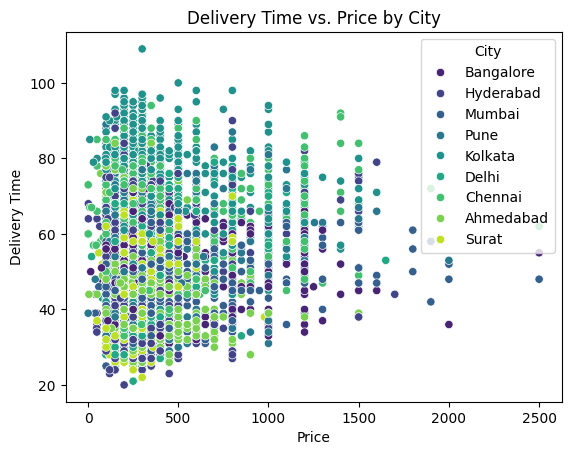

In [44]:
#Delivery Time vs Price by City
sns.scatterplot(x='Price', y='Delivery time', data=df, hue='City', palette='viridis')
plt.title('Delivery Time vs. Price by City')
plt.xlabel('Price')
plt.ylabel('Delivery Time')
plt.show()

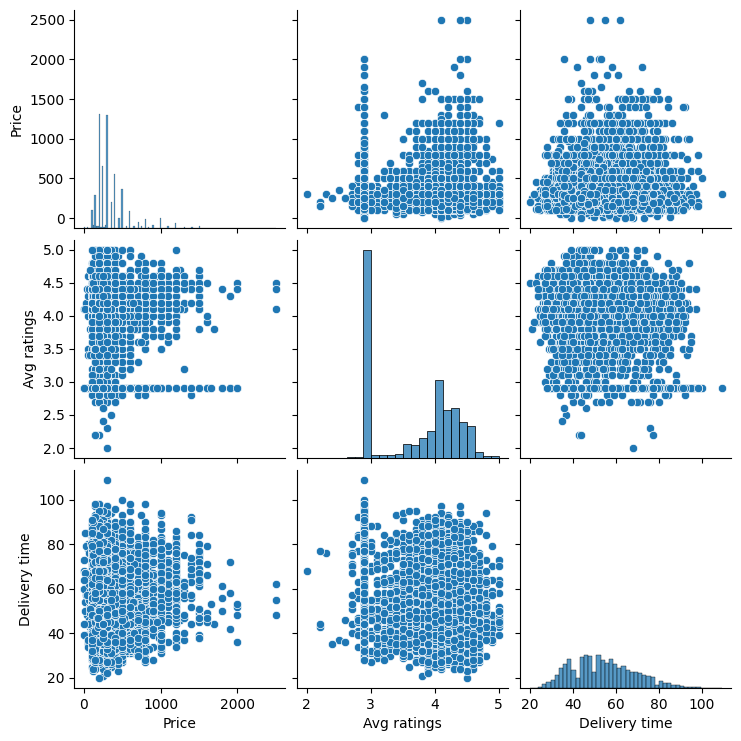

In [45]:
# Pairplot
sns.pairplot(df[['Price', 'Avg ratings', 'Delivery time']])
plt.show()

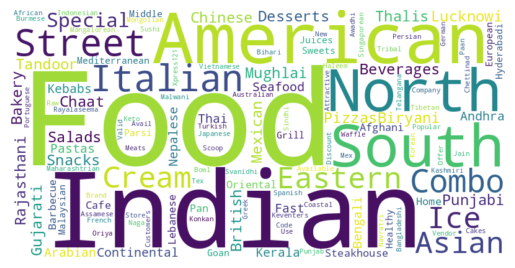

In [48]:
# Word cloud of cuisines
from wordcloud import WordCloud
all_cuisines = ' '.join(df1['Cuisines'].dropna().unique())
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(all_cuisines)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

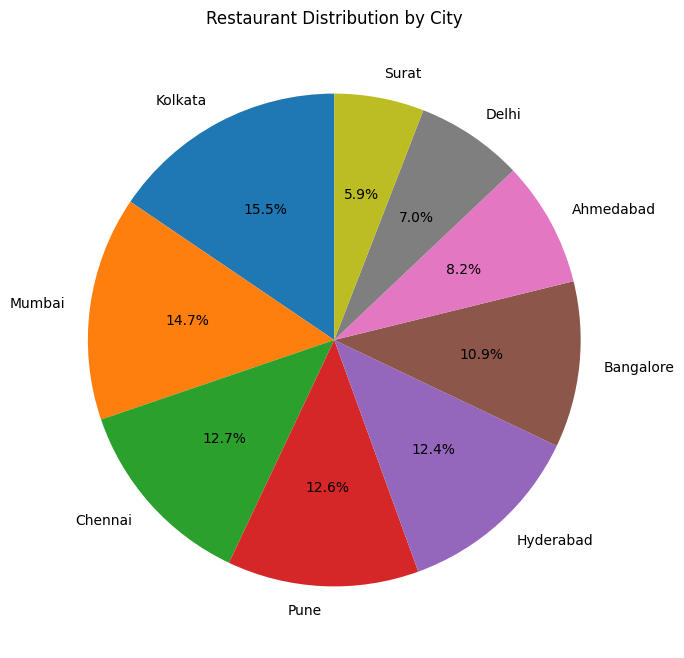

In [49]:
# Pie chart of restaurant by city
city_counts = df['City'].value_counts()
city_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Restaurant Distribution by City')
plt.ylabel('')
plt.show()

In [50]:
import plotly.express as px

cuisine_price = df1.groupby('Cuisines')['Price'].mean().reset_index()
fig = px.bar(cuisine_price.sort_values('Price', ascending=False).head(20),
             x='Cuisines', y='Price', title='Average Price by Cuisine',
             hover_data=['Price'], color='Price')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [52]:
restaurant_counts = df.groupby(['City', 'Area']).size().reset_index(name='Count')

import plotly.express as px
fig = px.treemap(restaurant_counts, path=['City', 'Area'], values='Count',
                 title='Restaurant Distribution by City and Area')
fig.show()

In [53]:
restaurant_counts = df.groupby(['City', 'Area']).size().reset_index(name='Count')

import plotly.express as px
fig = px.sunburst(restaurant_counts, path=['City', 'Area'], values='Count',
                  title='Sunburst of Restaurants by Location')
fig.show()

In [55]:
fig = px.box(df1, x='Cuisines', y='Price', points='all')
fig.update_layout(title='Price Distribution by Cuisine')
fig.show()